# HW1

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks
2. Toy regressions tasks
3. MNIST (binary) classification task

See the instructions before each section.

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Regarding Accuracy:
You must reach over 60% on each test set.

## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [314]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y



def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [315]:
#imports
import numpy as np
import torch

from tqdm import tqdm

import matplotlib.pyplot as plt

from torch import nn, optim

torch.manual_seed(0) # for make the random processes in torch consistent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Preprocessing function ####
# X, y are in numpy
def preprocessing(X, y):
  X_train, y_train = torch.Tensor(X).to(device), torch.Tensor(y).to(device).long()
  return X_train, y_train

# X = points, y = classes (colors)
# to("cuda") = run on GPU instead of CPU


### Training function ###
# X, y are in tensor
def training_model(model, X, y, optimizer, criterion, epoch_count):
  loss_arr = []
  for epoch in tqdm(range(epoch_count)):
    # no batches, predict the entire set
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    y_pred = model(X)  # Forward pass: compute predicted y by passing X to the model
    loss = criterion(y_pred, y)  # Compute loss: compute the loss between predicted and actual values
    loss_arr.append(loss.item())
    loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
    optimizer.step()  # Optimization step: update model parameters
  return model, loss_arr


### Plot training loss function ###
def plot_training_loss(loss_array):
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Traning loss across Epochs')
  plt.plot(loss_array)
  plt.show()


### Plot predicted labels and decision boundaries ###
# Write a plotting function that scatter plots the predicted labels and decision boundaries.
# X, y are in numpy
def plot_predicted_labels_and_decision_boundaries(X, y, trained_model, x_lim_axis, y_lim_axis, acc, dim=2):
  X_train, y_train = preprocessing(X, y)
  y_pred = trained_model(X_train).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)
  # for decision boundary
  xs = torch.linspace(-x_lim_axis, x_lim_axis, steps=100)
  ys = torch.linspace(-y_lim_axis, y_lim_axis, steps=100)
  xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')
  xx, yy = xx_m.ravel(), yy_m.ravel()
  xy_coord = torch.stack([xx, yy], dim=1).to(device)
  xx_m, yy_m = xx_m.cpu().numpy(), yy_m.cpu().numpy()  # Move meshgrid tensors to CPU before converting to numpy
  # visualize the data:
  decision_bound = trained_model(xy_coord).detach().cpu().numpy()
  decision_bound = np.argmax(decision_bound, axis=1)
  title = f"Predicted labels and decision boundaries, Accuracy: {acc:.3f}"
  plt.title(title)
  plt.scatter(xx_m, yy_m, c=decision_bound, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
  plt.show()



### Evaluation function ###
# Write an evaluation function that prints the set accuracy (train/test)
def evaluation_accuracy(X, y, trained_model):
  X_train, y_train = preprocessing(X, y)
  y_pred = trained_model(X_train).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)
  y = y.cpu().numpy()
  acc = np.mean(y_pred == y)
  print(f"Accuracy: {acc}")
  return acc


## EX1

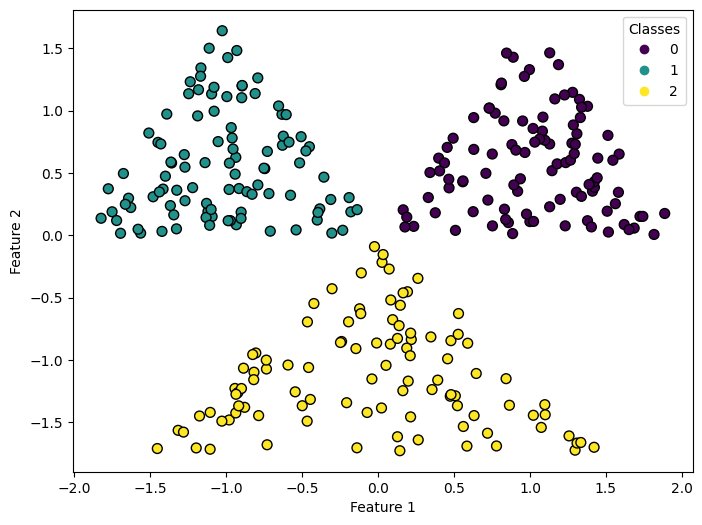

In [316]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)
#plot_data(X_test, y_test)

100%|██████████| 75/75 [00:00<00:00, 1191.85it/s]


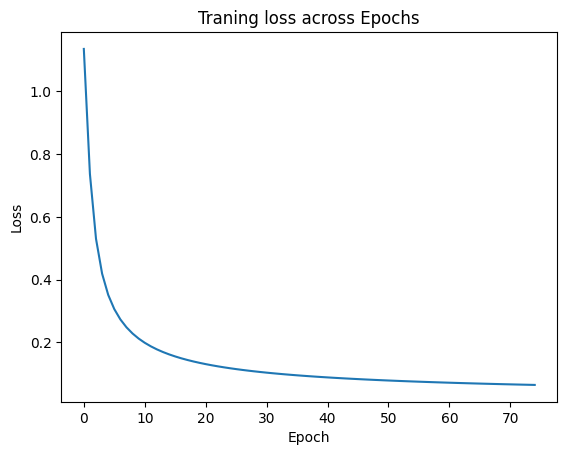

In [317]:
# 1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
X, y = preprocessing(X_train, y_train)
criterion = nn.NLLLoss()
input_size = 2
output_size = 3 # number of classes = size of y
my_model = nn.Sequential(nn.Linear(input_size, output_size),
                      # LogSoftmax + negative log liklihood loss
                      # OR linear + CrossEntropy loss
                      nn.LogSoftmax(dim=1))
my_model = my_model.to(device)
model_optimizer = optim.SGD(my_model.parameters(), lr=1, weight_decay=0.001)

# 2. Train the model and plot the loss across epochs.
epoch_count = 75
trained_model, loss_arr = training_model(my_model, X, y, model_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)


Accuracy: 1.0


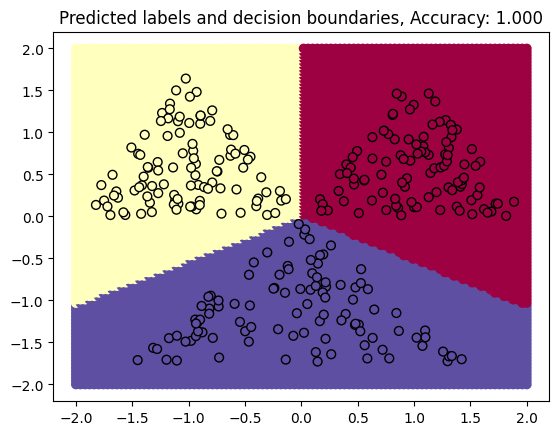

In [318]:
# 3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
acc = evaluation_accuracy(X, y, trained_model)
lim_axis = 2
plot_predicted_labels_and_decision_boundaries(X_train, y_train, trained_model, lim_axis, lim_axis, acc)

Accuracy: 0.9966666666666667


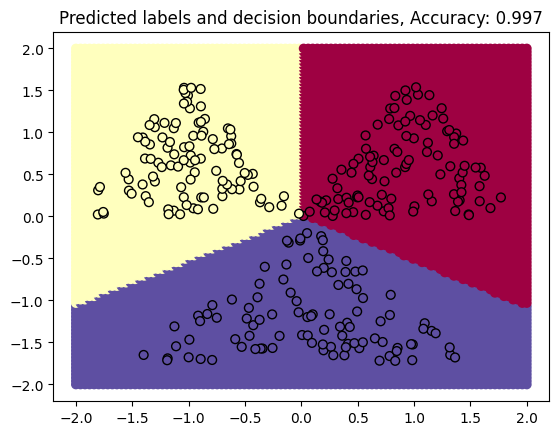

In [319]:
# 4. Plot the predicted labels and decision boundaries for the test set. Show the accuracy in the title (up to 3 decimals points).
X_te, y_te = preprocessing(X_test, y_test)
acc = evaluation_accuracy(X_te, y_te, trained_model)
plot_predicted_labels_and_decision_boundaries(X_test, y_test, trained_model, lim_axis, lim_axis, acc)

### **Theoretical EX1**

**Why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?**

As a first step, we wanted to establish a baseline, and complex the model as needed. We started with the LogisticRegression model we saw in the PSs, and the results were satisfactionary, so there was no need to try a different model.

when facing data meant for prediction we want to achieve two goals, being able to predict the data well and being able to explain why the model made those predictions. With a well performing LogisticRegression model like ours we are able to achieve both of two goals without compromising on any of them.

We anticipated the model would preform well after seeing the data structure is of 3 triangles, which could be seperated by simple linear lines.

## EX2

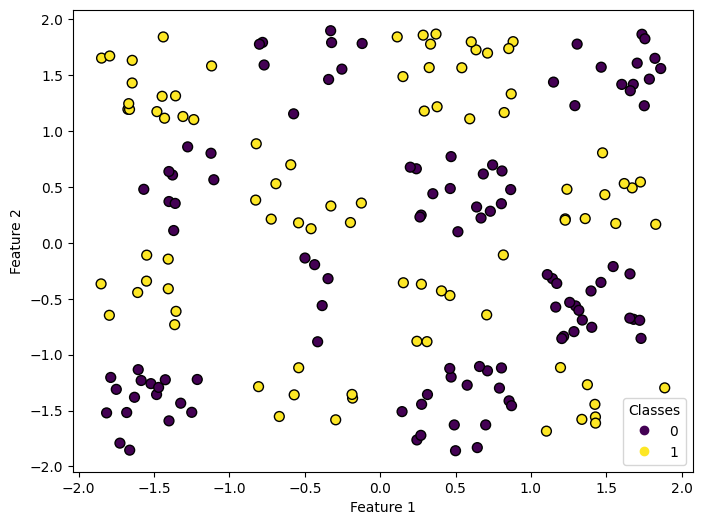

In [320]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 2000/2000 [00:03<00:00, 536.47it/s]


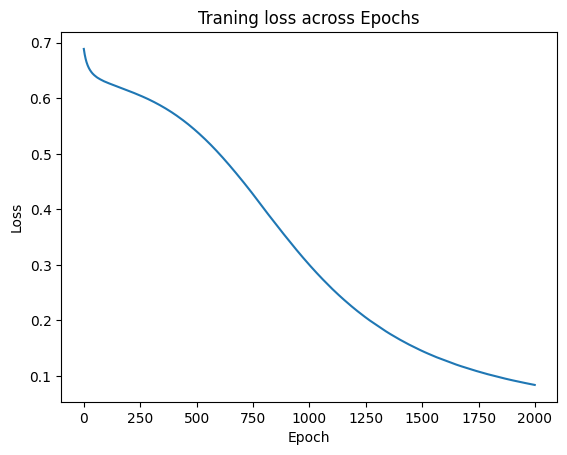

In [321]:
# 1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
X, y = preprocessing(X_train, y_train)
criterion = nn.CrossEntropyLoss()
input_size = 2 # dimensionality (x1,x2)
output_size = 2 # number of classes = size of y
hidden_size = 100
my_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(), # ReLU(x) = max{0,x}
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
my_model = my_model.to(device)
model_optimizer = optim.SGD(my_model.parameters(), lr=0.05, weight_decay=0.001)

# 2. Train the model and plot the loss across epochs.
epoch_count = 2000
trained_model, loss_arr = training_model(my_model, X, y, model_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)

Accuracy: 0.9948186528497409


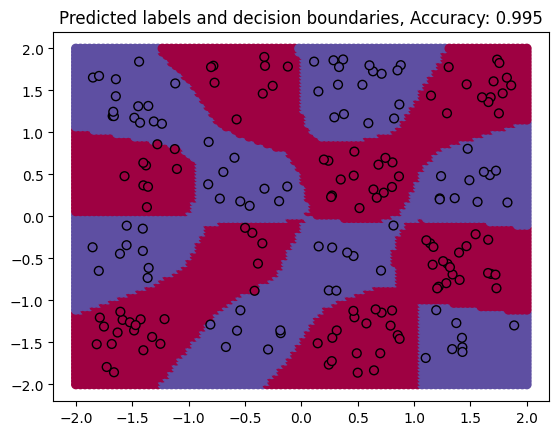

In [322]:
# 3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
acc = evaluation_accuracy(X, y, trained_model)
lim_axis = 2
plot_predicted_labels_and_decision_boundaries(X_train, y_train, trained_model, lim_axis, lim_axis, acc)

Accuracy: 0.93048128342246


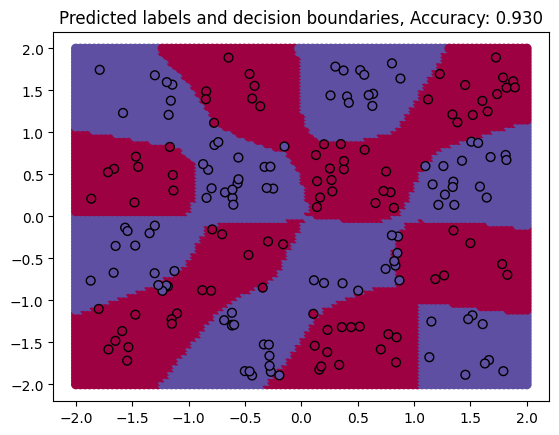

In [323]:
# 4. Plot the predicted labels and decision boundaries for the test set. Show the accuracy in the title (up to 3 decimals points).
X_te, y_te = preprocessing(X_test, y_test)
acc = evaluation_accuracy(X_te, y_te, trained_model)
plot_predicted_labels_and_decision_boundaries(X_test, y_test, trained_model, lim_axis, lim_axis, acc)

### **Theoretical Ex2**
**Why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?**

After looking at the data, we realized this isn't a linear problem, but as the previous ex, we wanted to start with the simple model to establish the baseline, so we started with the linear classifier LogisticRegression. As expected, this model can only classify the data of two classes into two boundaries (by a linear equation) so it led to poor accuracy (around 60%).

Our next step was to try and complicate the model by adding non-linear layers.
When we added one activation function (ReLU) and additional linear layer, the model accuracy improved to around 66% on the test. Therefore we continued to increase the complexity of the model in additional activation function (ReLU) and additional linear layer. This model got to a good accuracy of above 90% in both train and test. We tried to run it with different number of hidden layers and number of epochs to get the best result possible.

## EX3

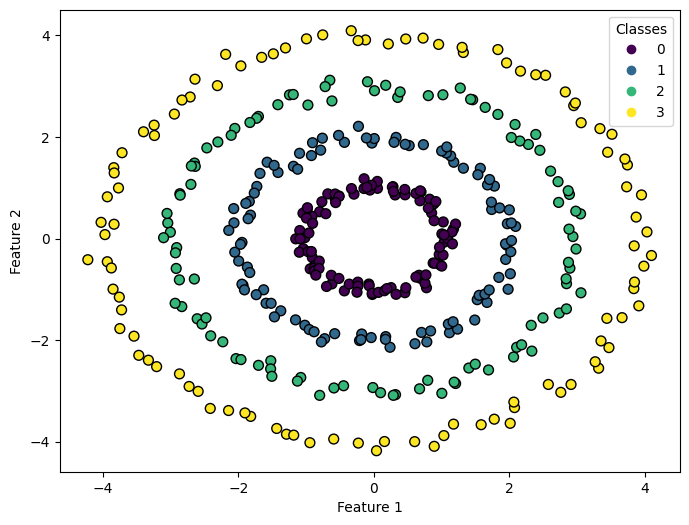

In [324]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


100%|██████████| 1000/1000 [00:01<00:00, 597.65it/s]


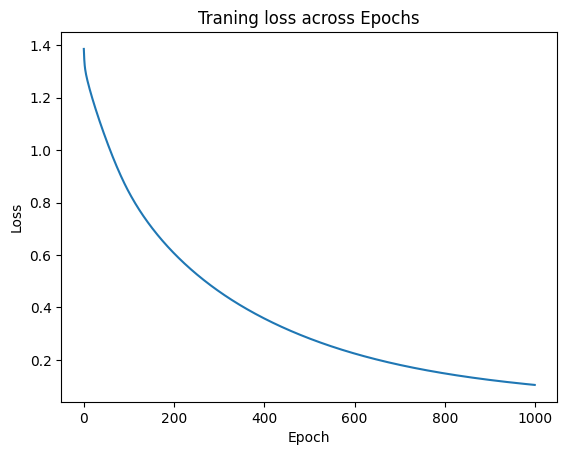

In [325]:
# 1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
X, y = preprocessing(X_train, y_train)
criterion = nn.NLLLoss()
input_size = 2
output_size = 4 # number of classes = size of y
hidden_size = 50
mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=0.1, weight_decay=0.0001)

# 2. Train the model and plot the loss across epochs.
epoch_count = 1000
trained_model, loss_arr = training_model(mlp_model, X, y, mlp_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)

Accuracy: 1.0


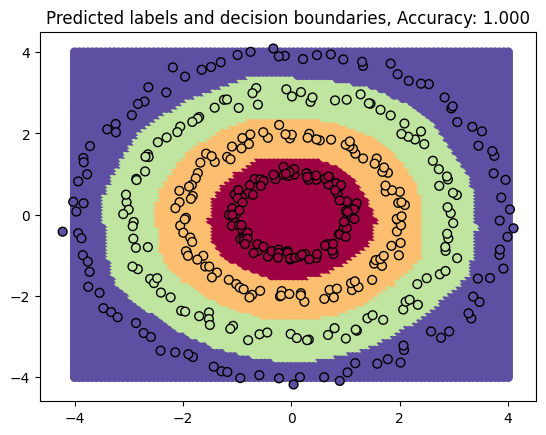

In [326]:
# 3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
acc = evaluation_accuracy(X, y, trained_model)
lim_axis = 4
plot_predicted_labels_and_decision_boundaries(X_train, y_train, trained_model, lim_axis, lim_axis, acc)

Accuracy: 1.0


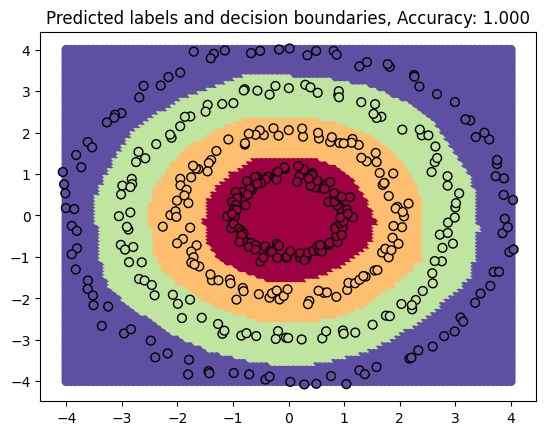

In [327]:
# 4. Plot the predicted labels and decision boundaries for the test set. Show the accuracy in the title (up to 3 decimals points).
X_te, y_te = preprocessing(X_test, y_test)
acc = evaluation_accuracy(X_te, y_te, trained_model)
lim_axis = 4
plot_predicted_labels_and_decision_boundaries(X_test, y_test, trained_model, lim_axis, lim_axis, acc)

### **Theoretical Ex3**
**Why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?**

After looking at the data, we realized this isn't a linear problem. So according to the results from ex2 we decided this time to start straight from adding one activation function (ReLU) and additional linear layer to the basic LogisticRegression model.
We tried to run it with different hidden layers, different number of epochs etc, and got great results.

## EX4

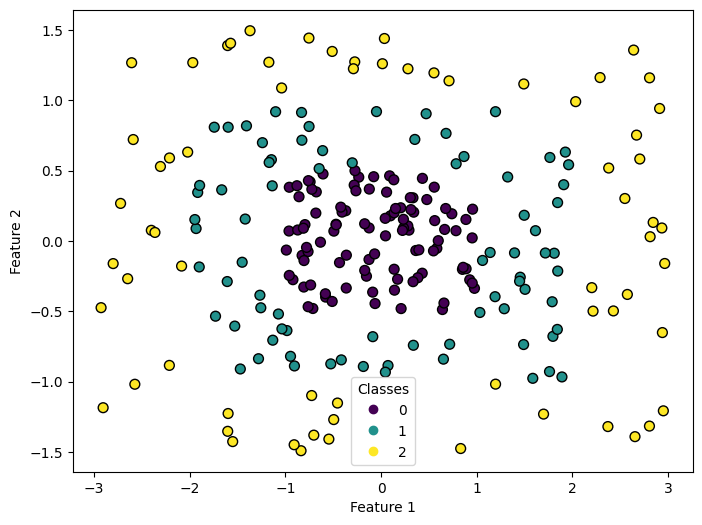

In [328]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1200/1200 [00:01<00:00, 1013.31it/s]


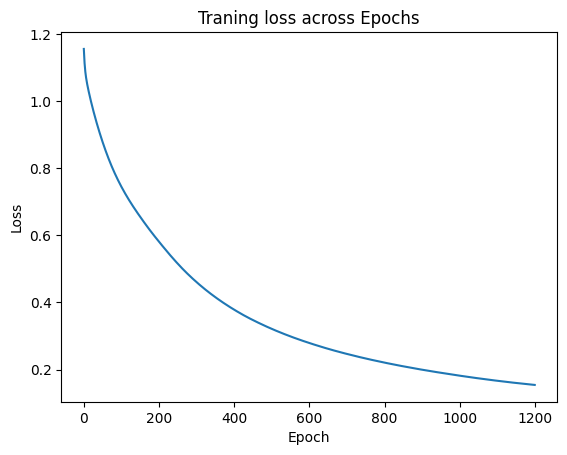

In [329]:
# 1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
X, y = preprocessing(X_train, y_train)
criterion = nn.NLLLoss()
input_size = 2
output_size = 3 # number of classes = size of y
hidden_size = 30
mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      # nn.Linear(hidden_size, hidden_size),
                      # nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=0.1, weight_decay=0.0001)

# 2. Train the model and plot the loss across epochs.
epoch_count = 1200
trained_model, loss_arr = training_model(mlp_model, X, y, mlp_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)


Accuracy: 0.9795081967213115


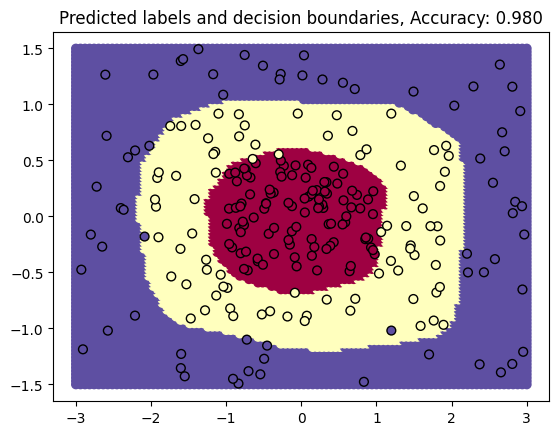

In [330]:
# 3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
acc = evaluation_accuracy(X, y, trained_model)
x_lim_axis = 3
y_lim_axis = 1.5
plot_predicted_labels_and_decision_boundaries(X_train, y_train, trained_model, x_lim_axis, y_lim_axis, acc)

Accuracy: 0.9519650655021834


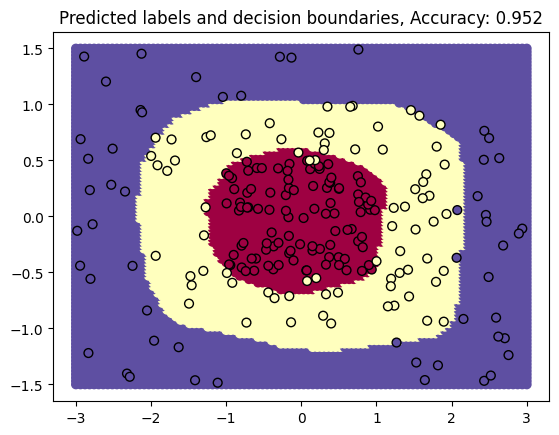

In [331]:
# 4. Plot the predicted labels and decision boundaries for the test set. Show the accuracy in the title (up to 3 decimals points).
X_te, y_te = preprocessing(X_test, y_test)
acc = evaluation_accuracy(X_te, y_te, trained_model)
plot_predicted_labels_and_decision_boundaries(X_test, y_test, trained_model, x_lim_axis, y_lim_axis, acc)

### **Theoretical Ex4**
**Why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?**

Similarly to ex3, after looking at the data, we realized this isn't a linear problem. So according to the results from ex2 and ex3 we decided to start straight from adding one activation function (ReLU) and additional linear layer to the basic LogisticRegression model.
We tried to run it with different hyper parameters, such as size of hidden layer, different number of epochs etc, and got good results.

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

In [332]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


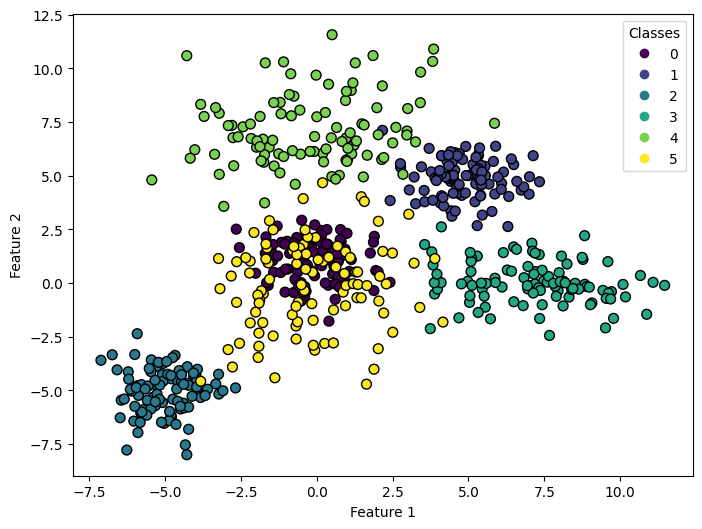

In [333]:
### Your code goes here ####
## Mount google drive ##

## load numpy array using np.load() ##
import os
os.chdir('/content/drive/My Drive/Deep_Learning/HW1/')
#print(os.listdir('.'))

X_test = np.load('X_test.npy')
X_test.shape # shape says the dim of the matrix (rows, colms)
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
# Plot the data (the first 2 dimentions)
plot_data(X_train, y_train)

100%|██████████| 20/20 [00:00<00:00, 708.27it/s]


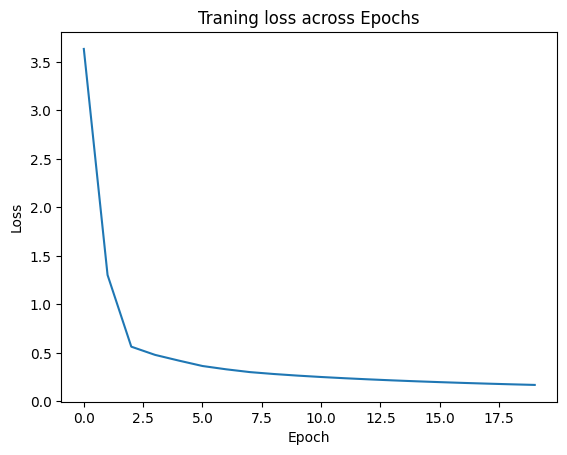

In [334]:
# 1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
X, y = preprocessing(X_train, y_train)
criterion = nn.NLLLoss()
input_size = 5 # dimensionality X is (600,5)
output_size = 6 # number of classes = size of y
hidden_size = 20
my_model = nn.Sequential(nn.Linear(input_size, output_size),
                      # LogSoftmax + negative log liklihood loss
                      # OR linear + CrossEntropy loss
                      nn.LogSoftmax(dim=1))
my_model = my_model.to(device)
model_optimizer = optim.SGD(my_model.parameters(), lr=1, weight_decay=0.0001)

# 2. Train the model and plot the loss across epochs.
epoch_count = 20
trained_model, loss_arr = training_model(my_model, X, y, model_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)


In [335]:
# 3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
print('Train ')
acc = evaluation_accuracy(X, y, trained_model)
# 4. Plot the predicted labels and decision boundaries for the test set. Show the accuracy in the title (up to 3 decimals points).
X, y = preprocessing(X_test, y_test)
print('Test ')
acc = evaluation_accuracy(X, y, trained_model)

Train 
Accuracy: 0.96
Test 
Accuracy: 0.9483333333333334


### **Theoretical Ex5**
**Why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?**

Here we saw the data is 5-dimentional, so we couldn't visualize it fully. Therefore we wanted to start with the LogisticRegression model we saw in the PSs, to see its result before trying a more complicated one.

After trying different hyper parameters such as learning rate, size of the hidden layer and epoch count, we got to a good accuracy.


#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [336]:
from sklearn.datasets import make_s_curve
### EX7 --> Ex6
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    #scatter = plt.scatter(X[:, 0], X[:, 1], c=true_y, cmap='viridis', edgecolor='k', s=50, alpha=0.5) # Our addition + true_y
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8 --> Ex7
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9 --> Ex8
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [337]:
### Imports
import numpy as np
import torch

from tqdm import tqdm

import matplotlib.pyplot as plt

from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Preprocessing function ####
# 4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
def MLP_preprocessing(X, y):
  X_tensor, y_tensor = torch.Tensor(X).to(device), torch.Tensor(y).to(device).float()
  return X_tensor, y_tensor


### Evaluation function ###
# 5. Write an evaluation function that prints the set Mean Square Error (train/test).
def MLP_evaluation_MSE(X, y, trained_model):
  X_train, y_train = preprocessing(X, y)
  y_pred = trained_model(X_train).detach().cpu().numpy()
  y = y.cpu().numpy()
  mse = np.square(np.subtract(y,y_pred.squeeze())).mean()
  # squize b/c y is [150] so want to convert y_pred from [150,1] to [150]
  print("Mean Square Error:", mse)
  return mse




## EX6

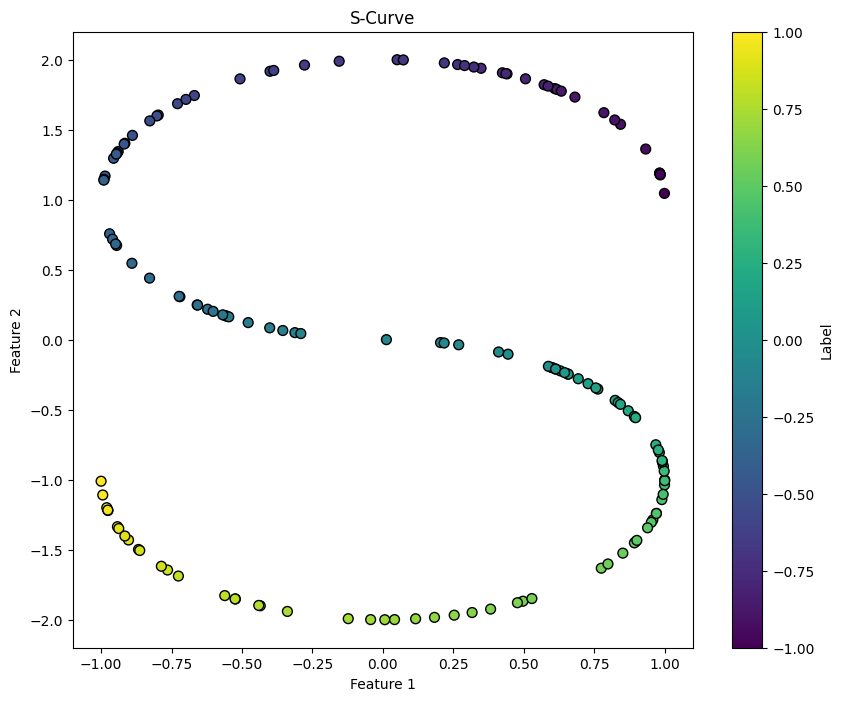

In [338]:
# Generate the data
X_train, t1 = generate_s_curve_data(random_state=0)
X_test, t2 = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, t1)
y_test = create_labels_s_curve(X_test, t2)

# Plot the data
plot_s_curve(X_train, y_train)

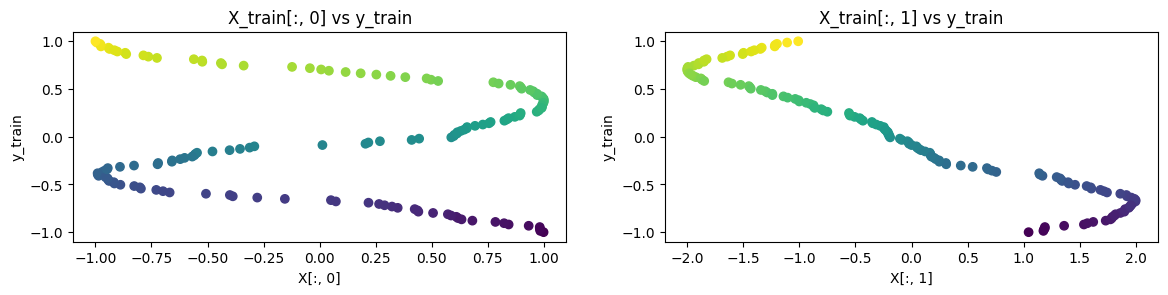

In [339]:
plt.figure(figsize=(14, 6))

# X_train[:, 0] vs y_train
plt.subplot(2, 2, 1)
plt.scatter(X_train[:, 0], y_train, c=y_train, cmap='viridis')
plt.title('X_train[:, 0] vs y_train')
plt.xlabel('X[:, 0]')
plt.ylabel('y_train')

# X_train[:, 1] vs y_train
plt.subplot(2, 2, 2)
plt.scatter(X_train[:, 1], y_train, c=y_train, cmap='viridis')
plt.title('X_train[:, 1] vs y_train')
plt.xlabel('X[:, 1]')
plt.ylabel('y_train')
plt.show()

100%|██████████| 80/80 [00:00<00:00, 934.97it/s]


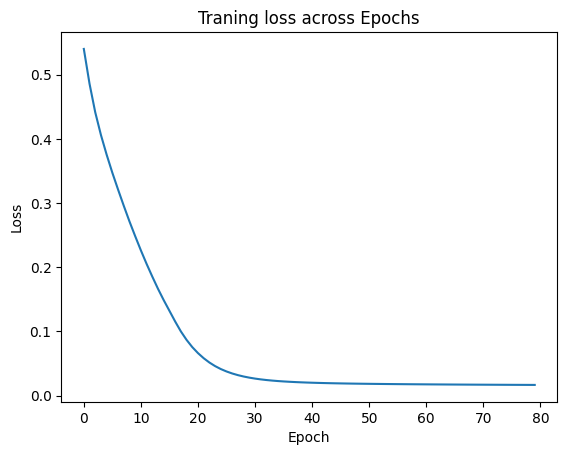

In [340]:
# 1. Create an MLP using PyTorch.
X, y = MLP_preprocessing(X_train, y_train)
hidden_size = 100
input_size = 2
lr = 0.01

criterion = nn.MSELoss()

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                          nn.Linear(hidden_size, 10),
                          nn.ReLU(),
                          nn.Linear(10, 1))
mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=lr)

mlp_model = mlp_model.to(device)

# 2. Train the model and plot the loss across epochs.
epoch_count = 80
# y.unsqueeze(dim=1) --> to convert y from [150] to [150,1]
trained_model, loss_arr = training_model(mlp_model, X, y.unsqueeze(dim=1), mlp_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)


Mean Square Error: 0.01659448


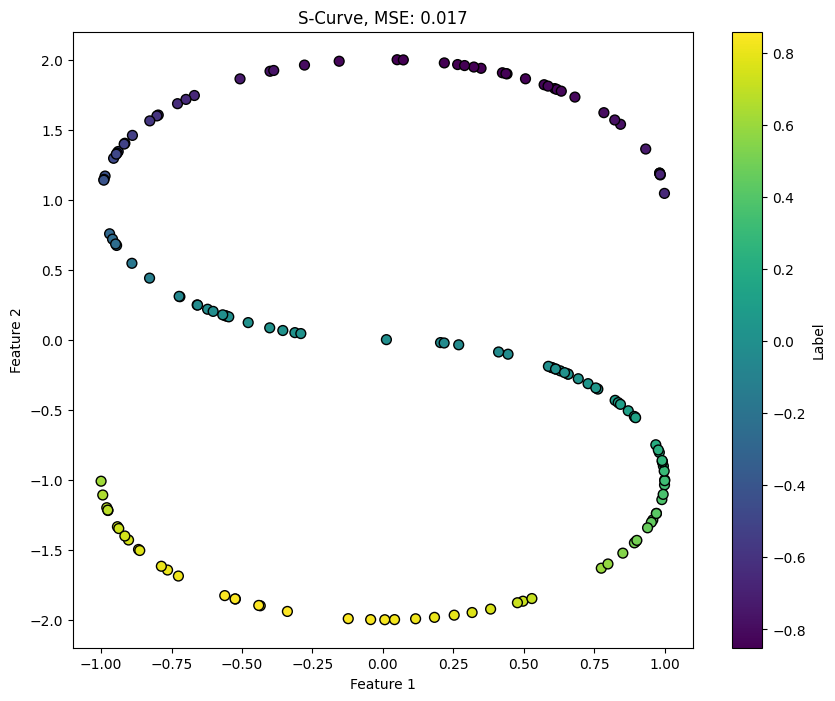

In [341]:
# 3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
mse = MLP_evaluation_MSE(X, y, trained_model)
y_pred = trained_model(X).detach().cpu().numpy()
title = f"S-Curve, MSE: {mse:.3f}"
plot_s_curve(X_train, y_pred, title)

Mean Square Error: 0.027843978


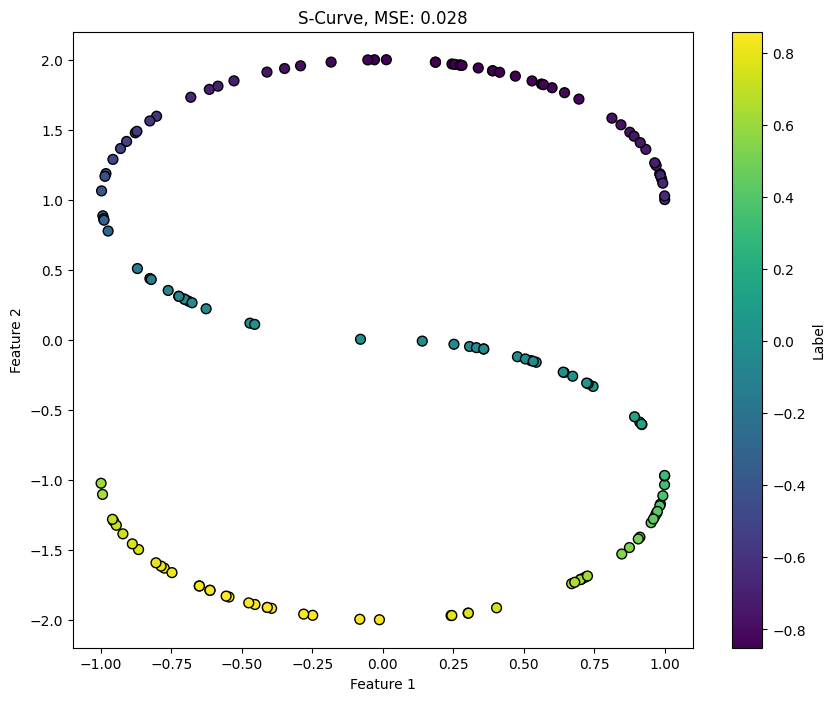

In [342]:
# 4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
X, y = MLP_preprocessing(X_test, y_test)
mse = MLP_evaluation_MSE(X, y, trained_model)
y_pred = trained_model(X).detach().cpu().numpy()
title = f"S-Curve, MSE: {mse:.3f}"
plot_s_curve(X_test, y_pred, title)

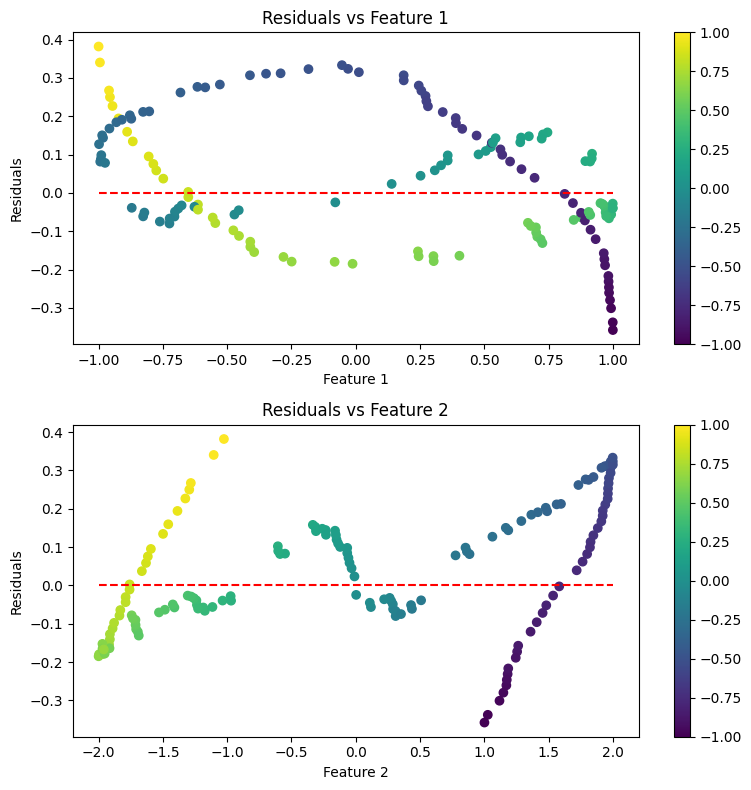

In [343]:
fig, axes = plt.subplots(2, 1, figsize=(8, 4 * 2))
residuals = y_test - y_pred.squeeze()
for i in range(2):
    sc = axes[i].scatter(X_test[:, i], residuals, c=y_test, marker='o')
    axes[i].hlines(y=0, xmin=X_test[:, i].min(), xmax=X_test[:, i].max(), colors='r', linestyles='--')
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residuals vs Feature {i+1}')
    fig.colorbar(sc, ax=axes[i])

plt.tight_layout()
plt.show()

### **Theoretical Ex6**
**Why did the model perform well/poorly? What affected your design choices?**

We started with a linear mode (one single linear layer with output size 1), and surprisingly the model got around 0.045 MSE on the test.
In order to understand why does a linear model "works" well, when the data is clearly not linear when plotting the data on the features plane, we decided to see how each of the features corresponds to the target vector (y).
These plots shows that the second feature of the data is very "close" to a linear shape. So we figured that the model, in order to decrease the MSE, mainly focused on the second feature.

We wanted to see if we could find a model that fits better. We decided to go with a variation of MLP. The model performed better then the linear one, with MSE of 0.028 on the test.

## EX7

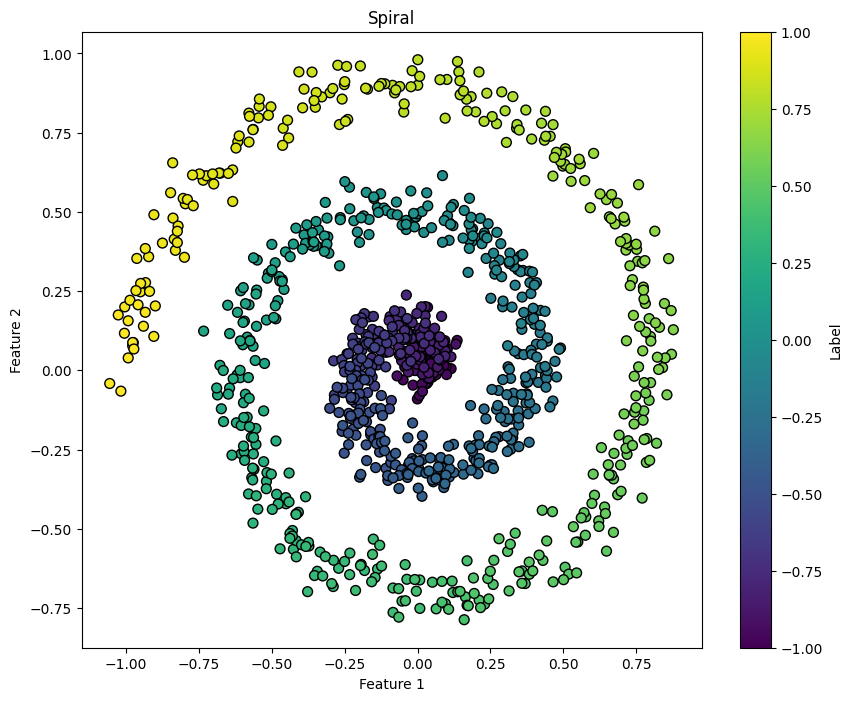

In [344]:
# Generate the data
X_train, theta1 = generate_spiral_data(random_state=0)
X_test, theta2 = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta1)
y_test = create_labels_spiral(theta2)
# Plot the data
plot_spiral(X_train, y_train)


100%|██████████| 1300/1300 [00:03<00:00, 350.25it/s]


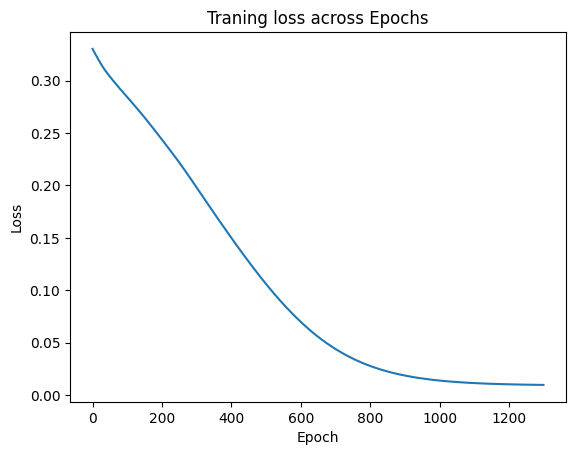

In [345]:
# 1. Create an MLP using PyTorch.
X, y = MLP_preprocessing(X_train, y_train)
hidden_size = 50
input_size = 2
lr = 0.01

criterion = nn.MSELoss()

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, 1))
mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=lr)

mlp_model = mlp_model.to(device)

# 2. Train the model and plot the loss across epochs.
epoch_count = 1300
# y.unsqueeze(dim=1) --> to convert y from [150] to [150,1]
trained_model, loss_arr = training_model(mlp_model, X, y.unsqueeze(dim=1), mlp_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)

Mean Square Error: 0.009644567


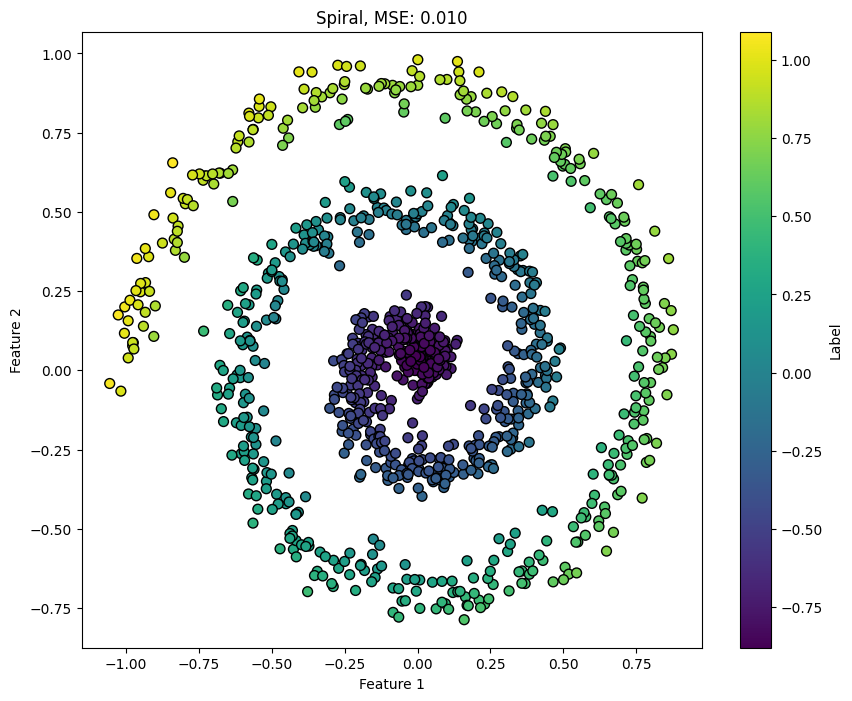

In [346]:
# 3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
mse = MLP_evaluation_MSE(X, y, trained_model)
y_pred = trained_model(X).detach().cpu().numpy()
title = f"Spiral, MSE: {mse:.3f}"
plot_spiral(X_train, y_pred, title)

Mean Square Error: 0.010347977


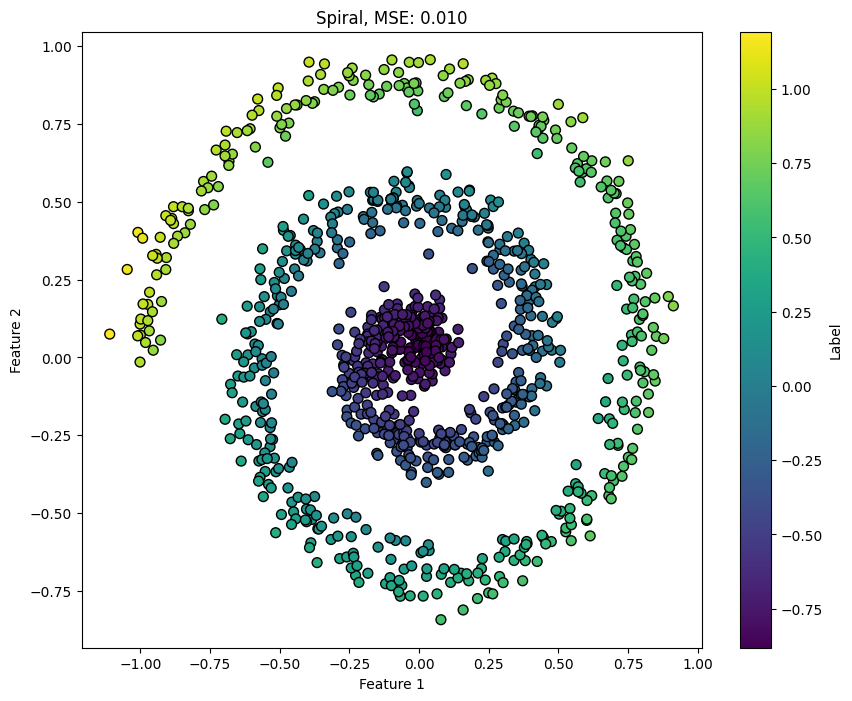

In [347]:
# 4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
X, y = MLP_preprocessing(X_test, y_test)
mse = MLP_evaluation_MSE(X, y, trained_model)
y_pred = trained_model(X).detach().cpu().numpy()
title = f"Spiral, MSE: {mse:.3f}"
plot_spiral(X_test, y_pred, title)

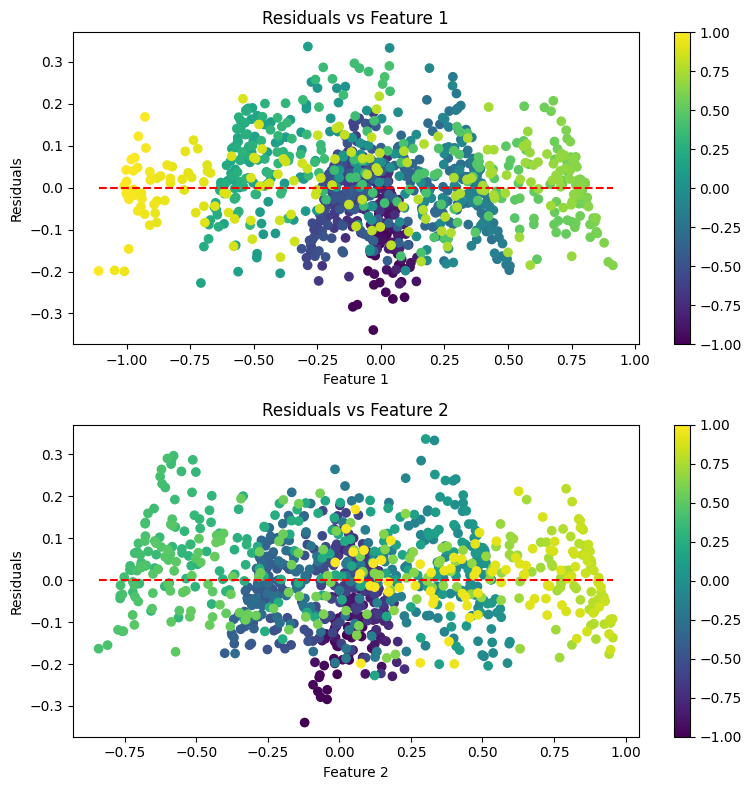

In [348]:
fig, axes = plt.subplots(2, 1, figsize=(8, 4 * 2))
residuals = y_test - y_pred.squeeze()
for i in range(2):
    sc = axes[i].scatter(X_test[:, i], residuals, c=y_test, marker='o')
    axes[i].hlines(y=0, xmin=X_test[:, i].min(), xmax=X_test[:, i].max(), colors='r', linestyles='--')
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residuals vs Feature {i+1}')
    fig.colorbar(sc, ax=axes[i])

plt.tight_layout()
plt.show()

### **Theoretical Ex7**
**Why did the model perform well/poorly? What affected your design choices?**

Here after seeing the code that generates the data clearly uses non-linear functions (sin and cos), we decided to skip using a linear model, and started off with a standard non-linear model with one ReLU activation function.
The model preformed well (0.019 MSE for both the train and the test).

We wanted to try and improve out results. We did it by making our network deeper by adding additional linear and non-linear layers.
The model improved to 0.011 MSE for the train and 0.012 MSE for the test.
We increased the number of epochs to see that the MSE converges.

## EX8

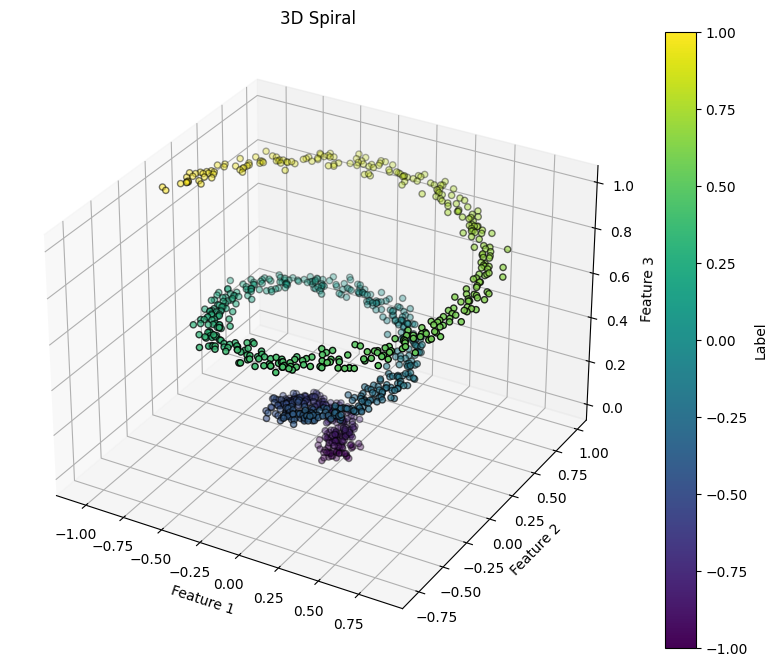

In [349]:
# Generate the data
X_train, theta1 = generate_spiral_data_3d(random_state=0)
X_test, theta2 = generate_spiral_data_3d(random_state=42)
# Create the labels
y_train = create_labels_3d_spiral(theta1)
y_test = create_labels_3d_spiral(theta2)
# Plot the data
plot_spiral_3d(X_train, y_train)

100%|██████████| 800/800 [00:01<00:00, 772.31it/s]


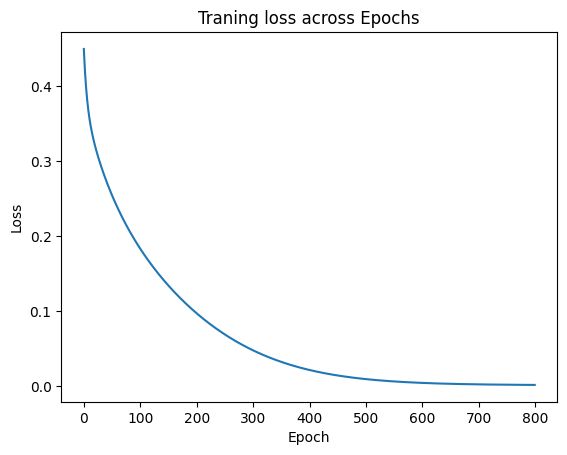

In [350]:
# 1. Create an MLP using PyTorch.
X, y = MLP_preprocessing(X_train, y_train)
hidden_size = 50
num_classes = 1
input_size = 3
lr = 0.01

criterion = nn.MSELoss()

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, num_classes))
mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=lr)

mlp_model = mlp_model.to(device)

# 2. Train the model and plot the loss across epochs.
epoch_count = 800
# y.unsqueeze(dim=1) --> to convert y from [150] to [150,1]
trained_model, loss_arr = training_model(mlp_model, X, y.unsqueeze(dim=1), mlp_optimizer, criterion, epoch_count)
plot_training_loss(loss_arr)

Mean Square Error: 0.0013175786


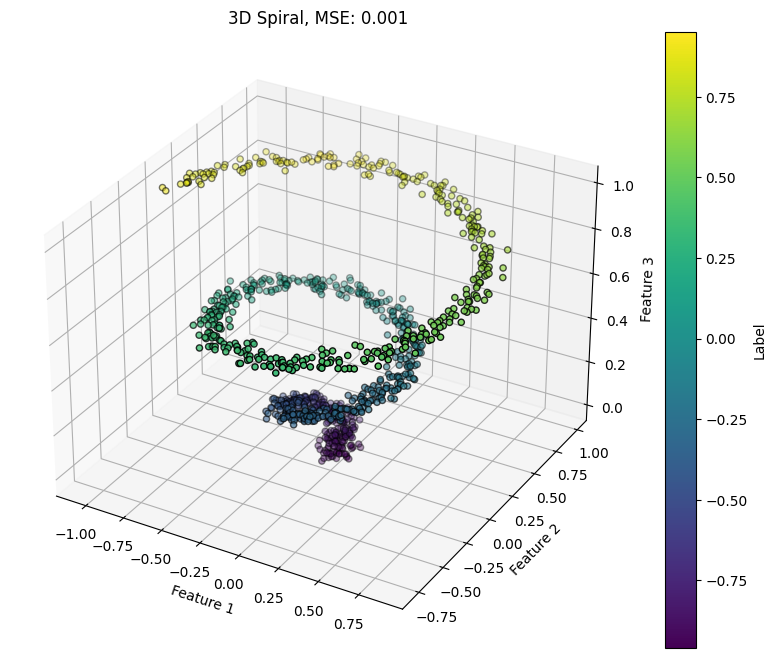

In [351]:
# 3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
mse = MLP_evaluation_MSE(X, y, trained_model)
y_pred = trained_model(X).detach().cpu().numpy()
title = f"3D Spiral, MSE: {mse:.3f}"
plot_spiral_3d(X_train, y_pred, title)

Mean Square Error: 0.0012528186


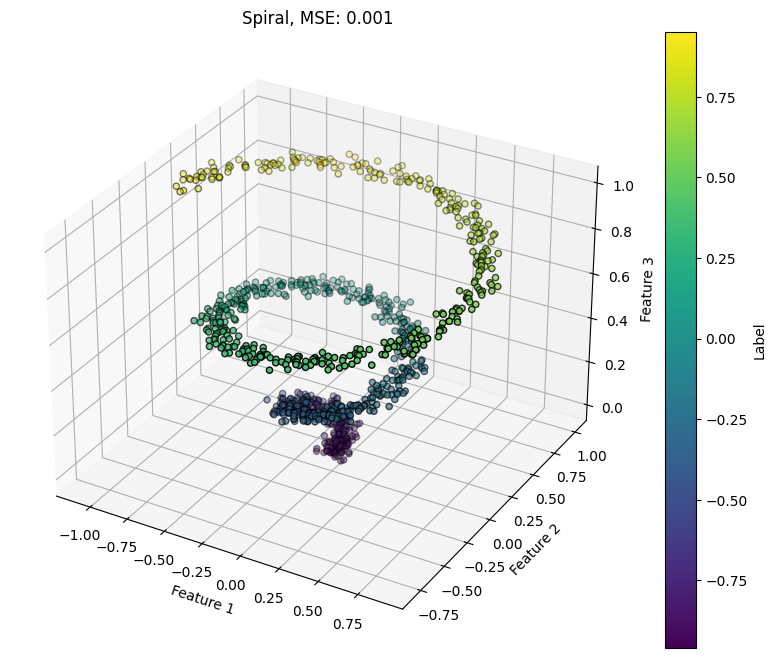

In [352]:
# 4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
X1, y1 = MLP_preprocessing(X_test, y_test)
mse1 = MLP_evaluation_MSE(X1, y1, trained_model)
y_pred1 = trained_model(X).detach().cpu().numpy()
title = f"Spiral, MSE: {mse:.3f}"
plot_spiral_3d(X_test, y_pred1, title)

### **Theoretical Ex8**
**Why did the model perform well/poorly? What affected your design choices?**

We noted that this problem is very similar to the previous one, with the addition of 3rd dimention.
We started with a non-linear regression model, with one ReLU activation function. The model performed very well (0.001 MSE for both test and train).


# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

In [353]:
from __future__ import print_function, division

import torch
import torchvision
from torchvision import datasets, models, transforms

import torch.nn as nn
import torch.nn.functional as F

In [354]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import random
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 2. Create a validation set out of the train set (80%-20% split)
def split_train_val(dataset, val_ratio=0.2):
  val_size = int(len(dataset) * val_ratio)
  train_size = len(dataset) - val_size
  train_subset, val_subset = random_split(dataset, [train_size, val_size])
  return train_subset, val_subset

# 3. Fot normalize the data
def get_mean_and_std(dataset):
    # Initialize lists to store images and labels
    images = []
    labels = []
    # Iterate through the subset and convert each item to numpy array
    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label)

    # Convert lists to numpy arrays
    images_np = np.array(images)
    labels_np = np.array(labels)

    return images_np.mean(), images_np.std()


# 5. Write an evaluation function that returns the accuracy
def eval_per_epoch(model, loader, criterion, epoch):
    model.eval()
    val_loss = []
    correct_val = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss.append(criterion(output, target).item())  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct_val += pred.eq(target.view_as(pred)).sum().item()
    val_acc = correct_val / len(loader.dataset)
    print(f'{val_acc=} at {epoch=}')
    #print(f'\nTest set: Average loss: {val_loss:.4f}, Accuracy: {val_acc}/{len(test_loader.dataset)} ({100. * val_acc / len(test_loader.dataset):.0f}%)\n')
    return val_acc, np.mean(np.array(val_loss))

# 4. Write a training function
def train_epoch(model, train_loader, optimizer, criterion , epoch):
  model.train()
  running_loss = 0
  correct = 0
  for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data) # distribution
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

      correct += pred.eq(target.view_as(pred)).sum().item()
      loss = criterion(output, target)
      running_loss += loss.item()
      loss.backward()
      optimizer.step()
      #if batch_idx % 100 == 0:
          #print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
  accuracy = correct / len(train_loader.dataset)
  avg_loss = running_loss / len(train_loader.dataset)
  return accuracy, avg_loss

def train_model(model, train_loader, validation_loader, optimizer, criterion , num_epochs):
  train_accurcy_arr = []
  train_loss_arr = []
  validation_accurcy_arr = []
  validation_loss_arr = []
  for epoch in range(0, num_epochs):
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, criterion , epoch)
    validation_acc, validation_loss = eval_per_epoch(model, validation_loader, criterion, epoch)
    train_accurcy_arr.append(train_acc)
    train_loss_arr.append(train_loss)
    validation_accurcy_arr.append(validation_acc)
    validation_loss_arr.append(validation_loss)
  return train_accurcy_arr, train_loss_arr, validation_accurcy_arr, validation_loss_arr


class ConvNet(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ConvNet, self).__init__()
        # 1 input image channel, 16 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(input_channels, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 5)
        # FC layers - since we use global avg pooling,
        #  input to the FC layer = #output_features of the second conv layer
        self.fc1 = nn.Linear(32, 64)  # 5*5 from image dimension
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # adaptive_avg_pool2d with output_size=1 = output size = output_channels
        x = F.adaptive_avg_pool2d(F.relu(self.conv2(x)), 1)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        # note: no softmax
        x = self.fc2(x)
        return x

# 6. Plot the training and validation accuracy for each epoch
def plot_accuracy(train_acc_array, val_acc_array):
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title("Accuracy accross epochs")
  plt.plot(train_acc_array, color="blue", label="Training accuracy")
  plt.plot(val_acc_array, color="red", label="Validation accuracy")
  plt.legend()
  plt.show()

# 7. Plot 10 test images of each class with their predicited labels
def plot_images_with_predictions(images_by_class, predicted_labels_by_class, num_images=10):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 4))

    for class_idx, digit in enumerate([digit1, digit2]):
        random_indices = random.sample(range(len(images_by_class[digit])), num_images)
        for i, rand_idx in enumerate(random_indices):
            image = images_by_class[digit][rand_idx]
            pred_label = predicted_labels_by_class[digit][rand_idx]
            axes[class_idx, i].imshow(image.squeeze(), cmap='gray')
            axes[class_idx, i].set_title(f'Pred: {pred_label}')
            axes[class_idx, i].axis('off')

    plt.tight_layout()
    plt.show()

In [355]:
# 1. Create a subset of the train/test sets for the two digits you have chosen
# device = 'cpu'
# Define transformations
transform = transforms.Compose([transforms.ToTensor(),])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Select two digits
digit1 = 0
digit2 = 8

# Extract indices of the chosen digits
train_indices = np.where((train_dataset.targets == digit1) | (train_dataset.targets == digit2))[0]
test_indices = np.where((test_dataset.targets == digit1) | (test_dataset.targets == digit2))[0]

# Create filtered datasets
train_dataset_filtered = torch.utils.data.Subset(train_dataset, train_indices)
test_dataset_filtered = torch.utils.data.Subset(test_dataset, test_indices)


# 3. Normalize the train data
train_mean, train_std = get_mean_and_std(train_dataset_filtered)
# Re-download the data with normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(train_mean, train_std)])
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# Extract indices of the chosen digits
train_indices = np.where((train_dataset.targets == digit1) | (train_dataset.targets == digit2))[0]
test_indices = np.where((test_dataset.targets == digit1) | (test_dataset.targets == digit2))[0]

# Create filtered datasets
train_dataset_filtered = torch.utils.data.Subset(train_dataset, train_indices)
test_dataset_filtered = torch.utils.data.Subset(test_dataset, test_indices)

# 2. Create a validation set out of the train set (80%-20% split)
train_subset, val_subset = split_train_val(train_dataset_filtered, val_ratio=0.2)

# Define batch size = how many samples from the dataset will be passed through the network at once while taking the gradient
batch_size = 3

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset_filtered, batch_size=batch_size, shuffle=False)


In [356]:

# Create a model
input_channels = 1
num_classes = 10
cnn_model = ConvNet(input_channels, num_classes).to(device)
lr = 0.01
optimizer = optim.SGD(cnn_model.parameters(), lr, momentum=0.9)
weights = [0.0 for _ in range(num_classes)]
weights[digit1] = 1.0
weights[digit2] = 1.0
weights = torch.Tensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight = weights)
# Train the model
num_epochs = 10
train_accurcy_arr, train_loss_arr, validation_accurcy_arr, validation_loss_arr = train_model(cnn_model, train_loader, val_loader, optimizer, criterion ,num_epochs)


val_acc=0.969838572642311 at epoch=0
val_acc=0.9477485131690739 at epoch=1
val_acc=0.9953271028037384 at epoch=2
val_acc=0.9949022939677146 at epoch=3
val_acc=0.9966015293118097 at epoch=4
val_acc=0.9936278674596432 at epoch=5
val_acc=0.9970263381478335 at epoch=6
val_acc=0.9974511469838573 at epoch=7
val_acc=0.9966015293118097 at epoch=8
val_acc=0.9970263381478335 at epoch=9


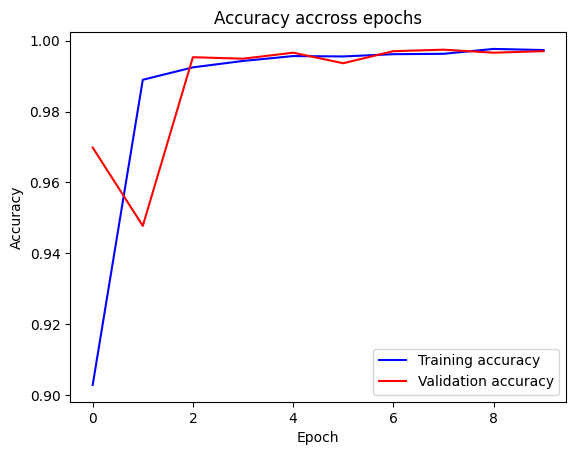

In [357]:
# 6. Plot the training and validation accuracy for each epoch
plot_accuracy(train_accurcy_arr, validation_accurcy_arr)

# train_mean_loss = np.mean(np.array(train_loss_arr))
# validation_mean_loss = np.mean(np.array(validation_loss_arr))

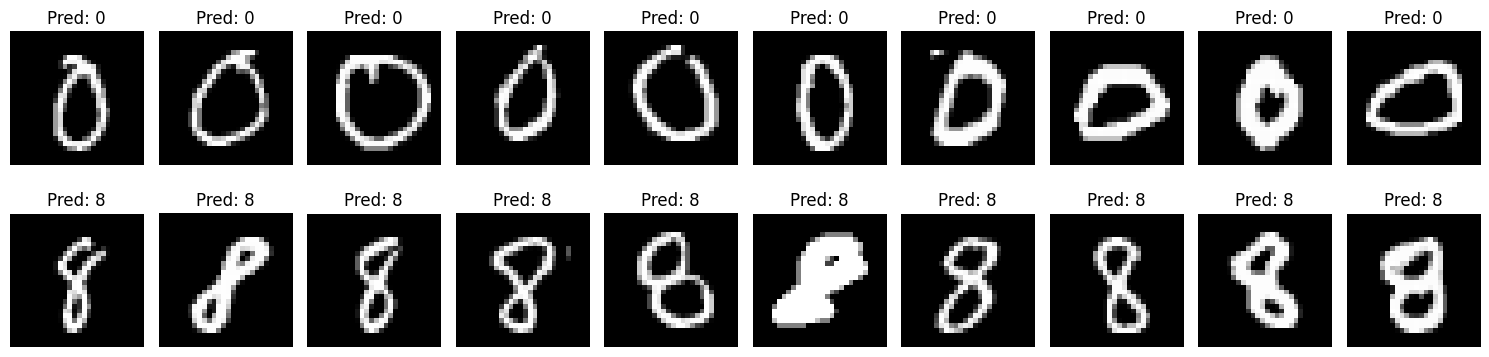

Test accuracy: 0.9989764585465711


In [359]:
# 7. Plot 10 test images of each class with their predicited labels

cnn_model.eval() # sets the model to evaluation mode.
images_by_class = {digit1: [], digit2: []}
predicted_labels_by_class = {digit1: [], digit2: []}

# Applying the model on the test database
correct = 0
with torch.no_grad(): # disable gradient computation
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = cnn_model(data)
        pred = output.argmax(dim=1, keepdim=True).view_as(target)
        correct += pred.eq(target.view_as(pred)).sum().item()
        for i in range(len(target)):
            label = target[i].item()
            images_by_class[label].append(data[i].cpu())
            predicted_labels_by_class[label].append(pred[i].item())
accuracy = correct / len(test_loader.dataset)

plot_images_with_predictions(images_by_class, predicted_labels_by_class)

# 8. Print the test set accuracy
print(f"Test accuracy: {accuracy}")

### **Theoretical Ex9**

#### Briefly explain why you have chosen each parameter:
###1. Model: MLP, CNN (both are valid options)
##### We chose CNN as it is less parameter-costly and also performs well wherever spatial features are needed to be captured.
###2. Number of layers, number of neurons/kernels, kernel size
##### Our model consist of 2 convolution layers(first conv with a 3x3 sized kernel, second cov had a 5x5 kernel), 1 max pool layer, 1 avg pool layer and 2 linear layers(first linear layer with hidden size of 64, and a second linear layer that maps into our classes(2))
###3. Number of epochs (between 10-100)
##### We chose the the minimum number of epochs (10) as we found that the model performs very well and any additional computation would be unnecessary.
###4. Learning rate
##### The learning rate we chose is 0.01. We found after performing some tests that it yields very good accuracy on a small number of epochs.
###5. Loss function
##### We chose cross-entropy loss function as its output yields a distribution over classes for the predictions. (This loss function is suitable for classification tasks).
###6. Activation function
##### We chose the ReLU activation function as the MNIST problem is clearly non-linear and ReLU is an effective non-linear activation function.

### Discuss the results (3-5 lines)
### Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.
##### The model converged and judging by the accuracy of the test data it did not overfit. Classifying images is inherently different from the other toy examples we did as earlier, unlike the the data of those example, the mnist dataset contains both a higher dimension than our previous examples and in addition it has a spatial structure.
##### The model converged nicely without any overfitting (shown by the similar results in both the validation and test datasets).
##### The HW given to use gave a chance to feel a "hands on" machine learning working on it helped us understand the exercises shown in the Practice sessions and overall was fun, intriguing, and a bit diffcult at some points as it should be.